In [1]:
### Load Trained Segmentation Model

import torch
model = torch.load("model.pth", map_location=torch.device("cpu"))
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [2]:
### Load Infernce Targets
import os
dataDir = os.path.join("Nov24", "Hoang")
data = list(os.listdir(dataDir))
data

['01.png',
 '03.png',
 '02.png',
 '06.png',
 '07.png',
 '05.png',
 '04.png',
 '08.png']

In [3]:
### Convert Target to PNG PIL Image
from PIL import Image
PIL_Images = []

for image in data:
    image = Image.open(os.path.join(dataDir, image))
    if image.format != "JPEG":
        image = image.convert("RGB")
        PIL_Images.append(image)
    else:
        PIL_Images.append(image)
        
PIL_Images

[<PIL.Image.Image image mode=RGB size=530x622 at 0x134AEFE10>,
 <PIL.Image.Image image mode=RGB size=415x439 at 0x136204A90>,
 <PIL.Image.Image image mode=RGB size=540x540 at 0x134AEFEB8>,
 <PIL.Image.Image image mode=RGB size=436x412 at 0x136210B70>,
 <PIL.Image.Image image mode=RGB size=541x610 at 0x136210A90>,
 <PIL.Image.Image image mode=RGB size=553x627 at 0x136210978>,
 <PIL.Image.Image image mode=RGB size=541x557 at 0x1362107B8>,
 <PIL.Image.Image image mode=RGB size=443x464 at 0x1362106A0>]

In [4]:
### Plot the Inference Targets
import math
import matplotlib.pyplot as plt

def PLOT(Images):
    count = len(Images)
    nrows = math.ceil(count/2)
    ncols = 2
    fig, axis = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_figwidth(100)
    fig.set_figheight(100)
    
    for idx, image in enumerate(Images):
        row = math.floor(idx/2)
        col = idx%2
        cell = axis[row, col]
        cell.imshow(image)

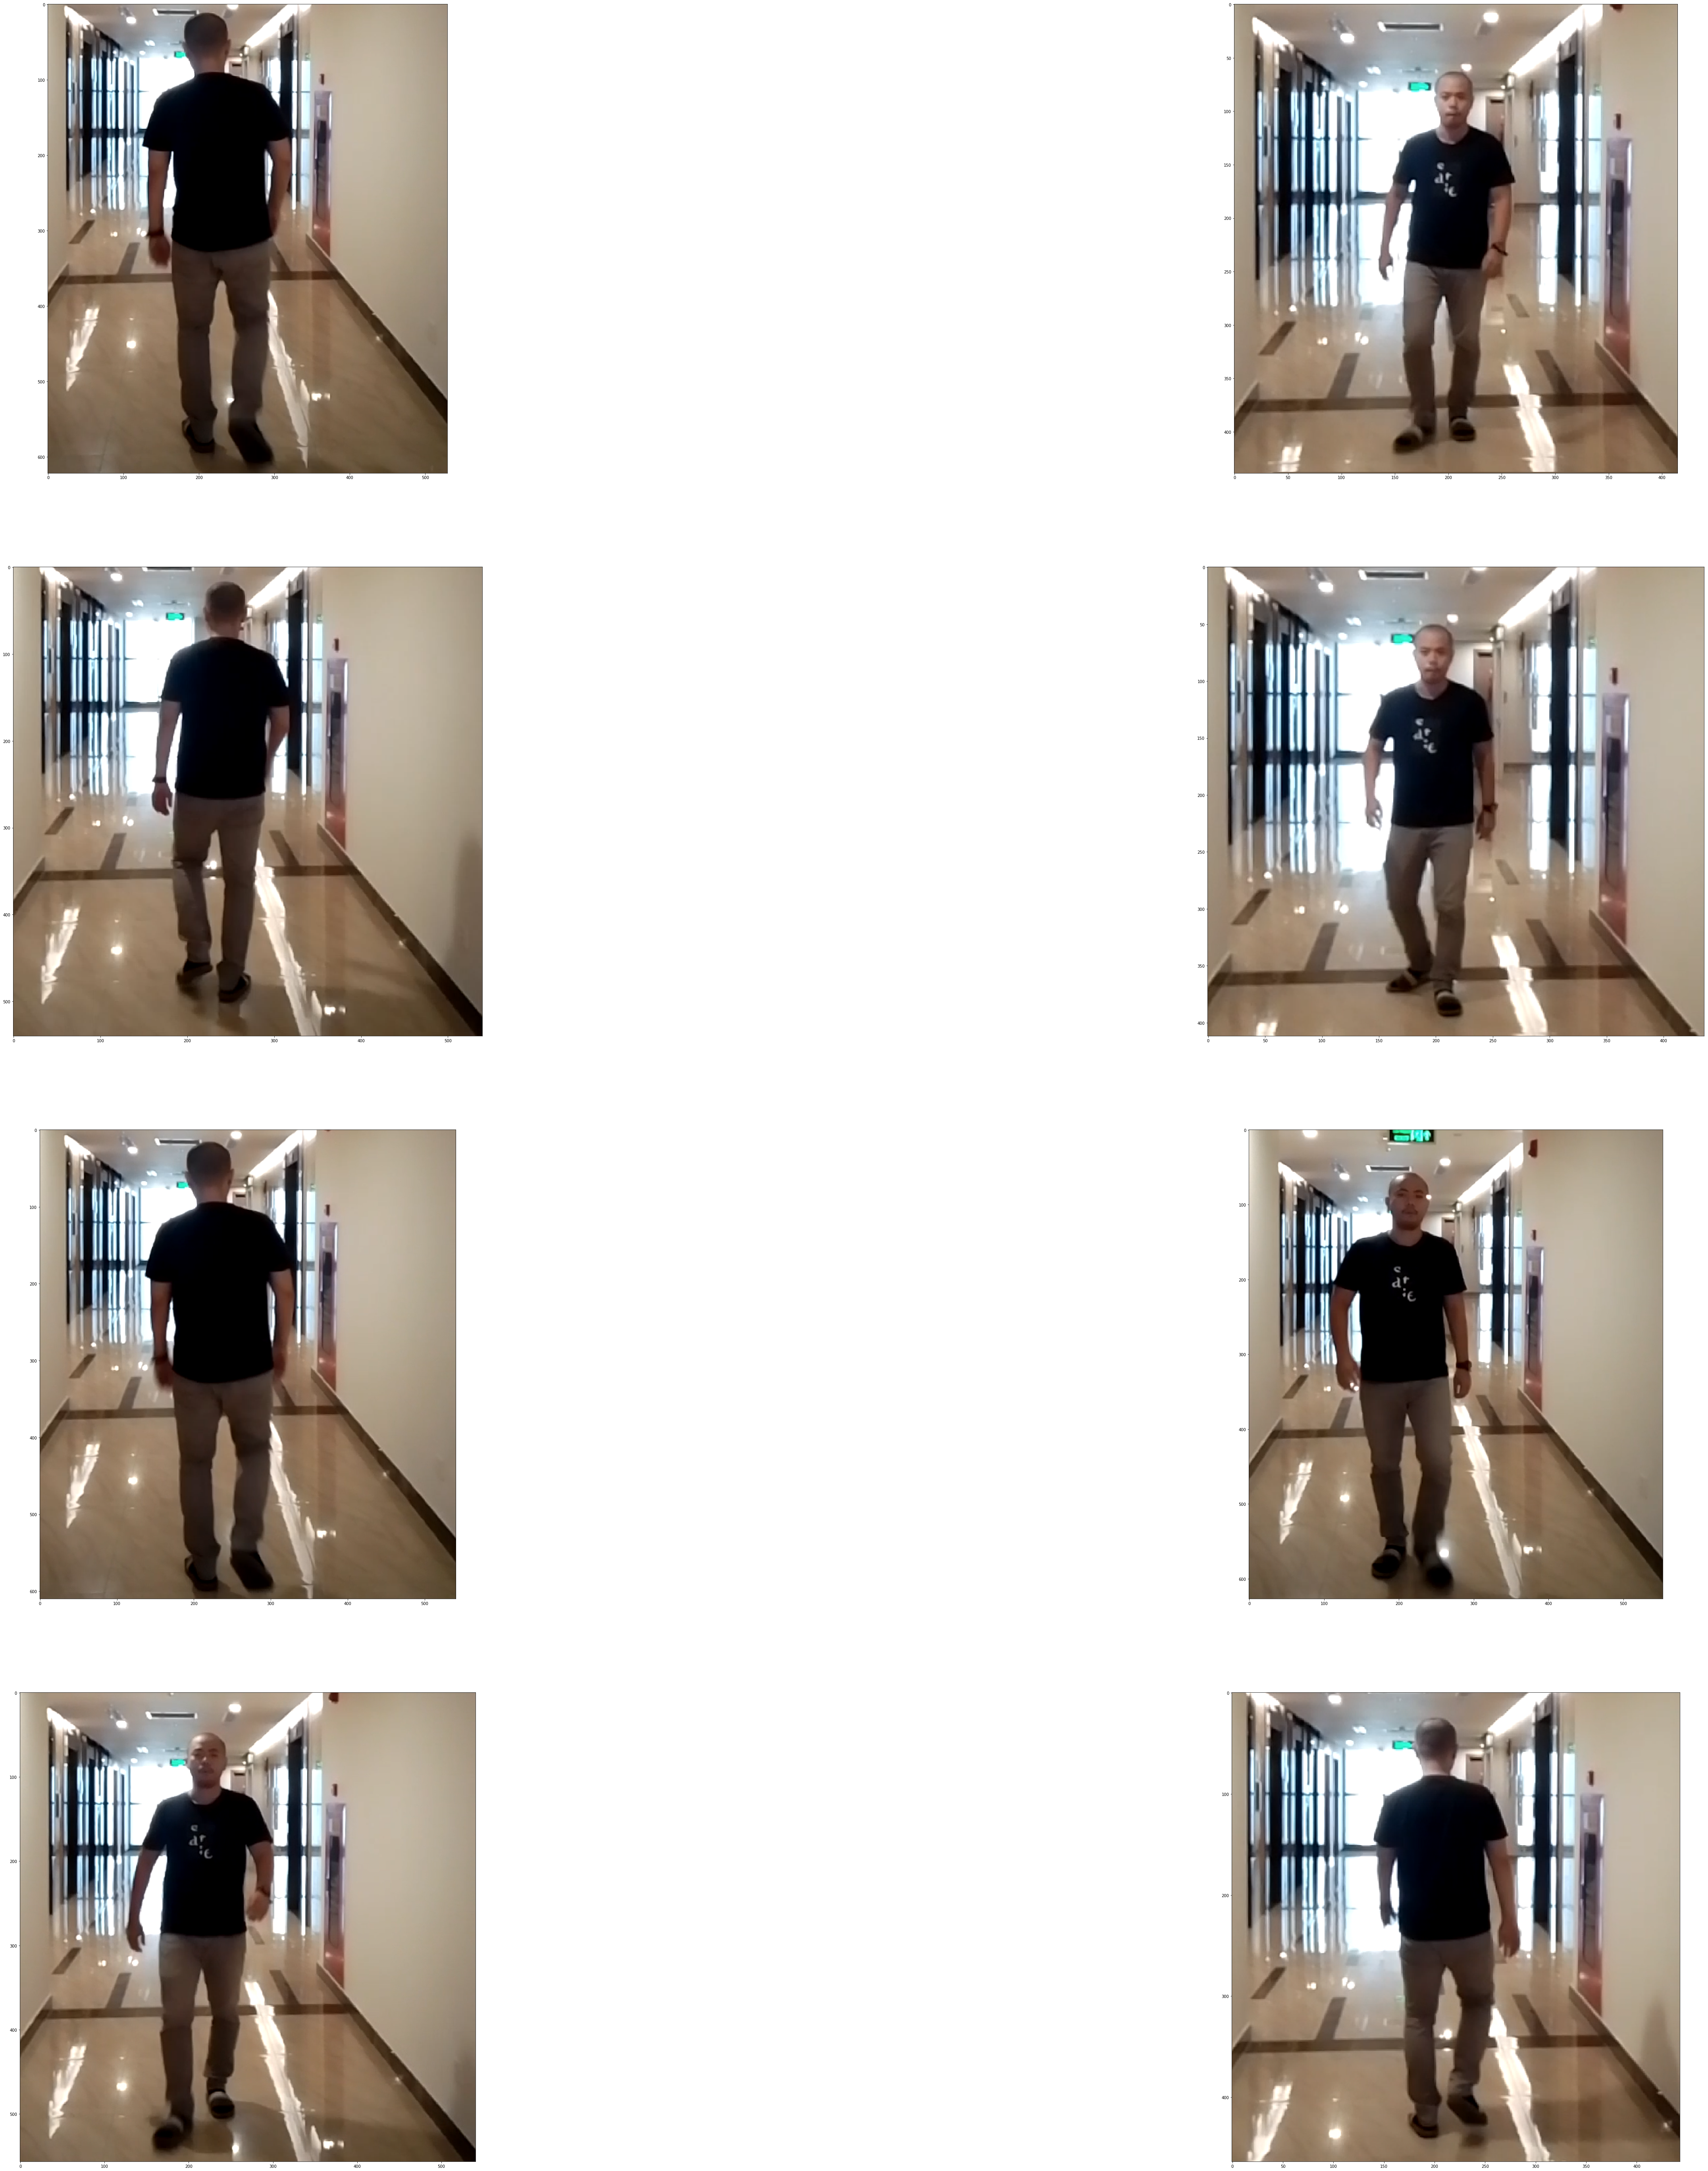

In [5]:
PLOT(PIL_Images)

In [6]:
### Make Prediction and Plot Results
from torchvision.utils import draw_segmentation_masks
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
weights =  MaskRCNN_ResNet50_FPN_Weights.COCO_V1
transforms = weights.transforms()
masks = []

for image in PIL_Images:
    input_image = transforms(image)
    prediction = model([input_image.to("cpu")])
    mask = prediction[0]["masks"][0,0].mul(255).byte().cpu().numpy()
    print(mask)
    masks.append(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


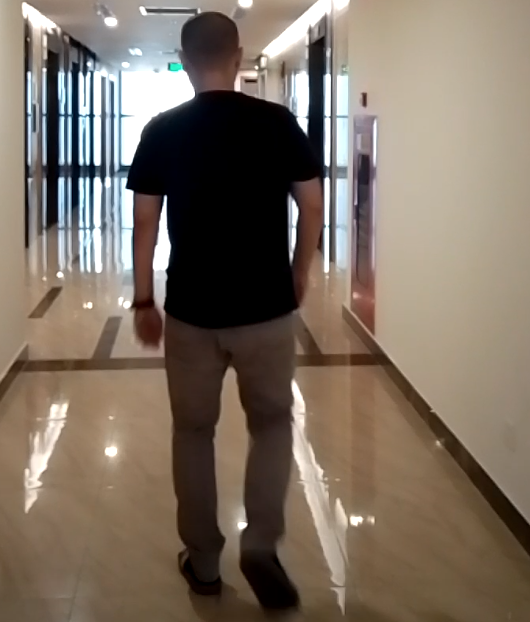

In [7]:
from torchvision.utils import draw_segmentation_masks

image1 = PIL_Images[0]
mask1 = masks[0]

image1

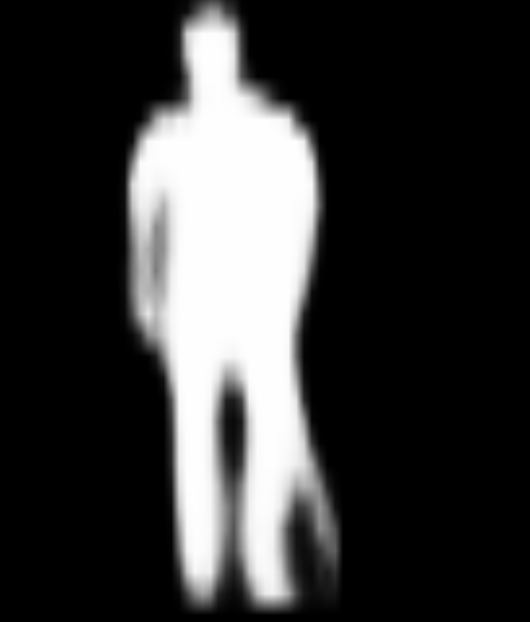

In [8]:
overlay_mask = Image.fromarray(mask1)
overlay_mask

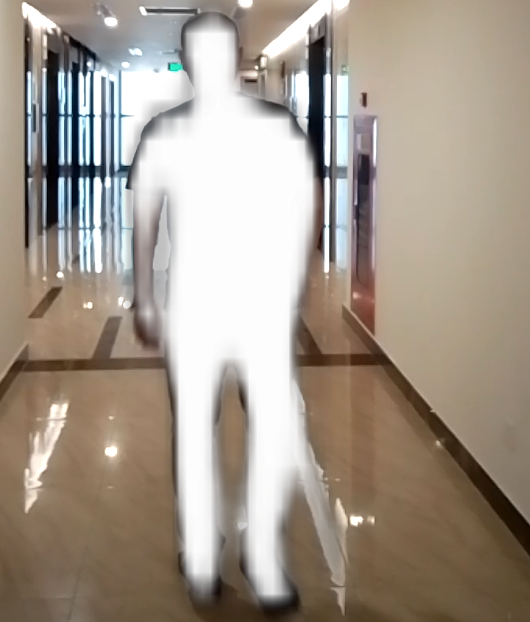

In [9]:
masked_image = image1.copy()
masked_image.paste(overlay_mask, (0,0), mask=overlay_mask)
masked_image